# Project 3 solutions: 

### Generating percolation cluster

In [1]:
import numpy as np
import scipy.ndimage.measurements as measure
from matplotlib import cm
import myplot as mp

from pylab import *

Connectivity structure:  [[0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


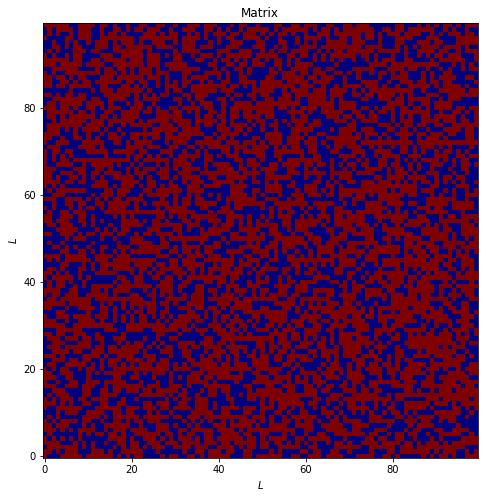

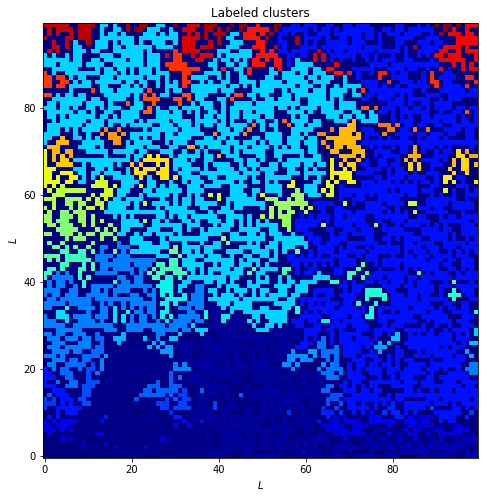

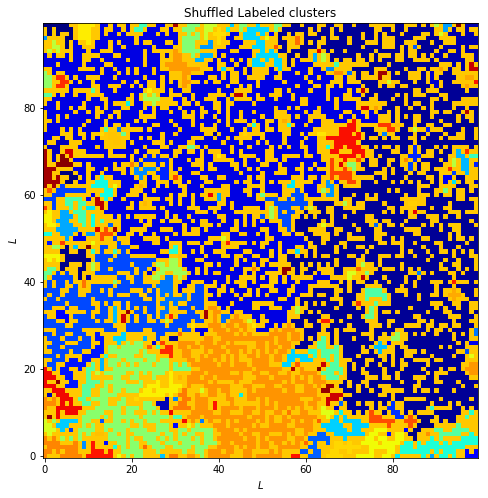

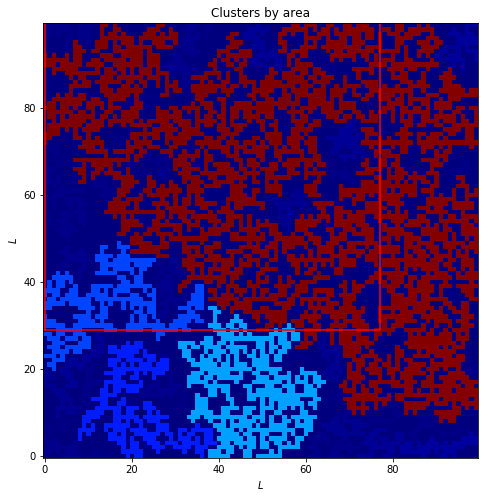

In [2]:
## Generating the percolation matrix consisting of occupied (True) and unoccupied (False)
L = 100 # number of sites
r = np.random.rand(L,L)
p = 0.6
z = r<p
            
## Creating connectivity structure: 4-connected structure
conn = np.ones((3,3))
conn[0,0] = 0
conn[0,2] = 0
conn[2,0] = 0
conn[2,2] = 0
print('Connectivity structure: ', conn)

## Labeling clusters by using 4-connected structure
lw, num = measure.label(z,structure=conn)

## Shuffeling labels for better distinction
b = arange(lw.max() + 1)
shuffle(b)
shuffledLw = b[lw]

## Extracting clusters area
area = measure.sum(z, lw, index=arange(num + 1))
areaImg = area[lw]

## Finding the bounding box for the bigest cluster
sliced = measure.find_objects(areaImg == areaImg.max())

## plotting
fig, ax = subplots(figsize=(8, 8))
ax.imshow(z, cmap=cm.jet, origin='lower', interpolation='nearest')
ax.set_xlabel('$L$')
ax.set_ylabel('$L$')
ax.set_title("Matrix")

fig, ax = subplots(figsize=(8, 8))
ax.imshow(lw, cmap=cm.jet, origin='lower', interpolation='nearest')
ax.set_xlabel('$L$')
ax.set_ylabel('$L$')
ax.set_title("Labeled clusters")

fig, ax = subplots(figsize=(8, 8))
ax.imshow(shuffledLw, cmap=cm.jet, origin='lower', interpolation='nearest')
ax.set_xlabel('$L$')
ax.set_ylabel('$L$')
ax.set_title("Shuffled Labeled clusters")

fig, ax = subplots(figsize=(8, 8))
img = ax.imshow(areaImg, cmap=cm.jet, origin='lower', interpolation='nearest')
ax.set_xlabel('$L$')
ax.set_ylabel('$L$')
ax.set_title("Clusters by area")

if(len(sliced) > 0):
    sliceX = sliced[0][1]
    sliceY = sliced[0][0]
    plotxlim=img.axes.get_xlim()
    plotylim=img.axes.get_ylim()
    plot([sliceX.start, sliceX.start, sliceX.stop, sliceX.stop, sliceX.start],
                     [sliceY.start, sliceY.stop, sliceY.stop, sliceY.start, sliceY.start],
                     color="red")
    xlim(plotxlim)
    ylim(plotylim)

a) Using these features, you should make a program to calculate $P (p, L)$ for various $p$. Hint: you can use either BoundingBox or intersect and union to find the spanning cluster. How robust is your algorithm to changes in boundary conditions? Could you do a rectangular grid where $L_x \ll L_y$? Could you do a more complicated set of boundaries? Can you think of a simple method to ensure that you can calculate $P$ for any boundary geometry?

In [3]:
import numpy as np
import scipy.ndimage.measurements as measure
import myplot as mp

In [4]:
## initial parameters
p_start = 0.1
p_end = 1
num_p = 1000                         # number of steps for filling probability
p = np.linspace(p_start,p_end,num_p) # probability of a block being filled
L = 100                              # number of sites
N_sim = 10                           # number of simulations

## Creating connectivity structure: 4-connected structure
conn = np.ones((3,3))
conn[0,0] = 0
conn[0,2] = 0
conn[2,0] = 0
conn[2,2] = 0
print('Connectivity structure: ', conn)

Connectivity structure:  [[0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


In [5]:
## Calculating density of spanning cluster [P(p,L)] and Percolation probability [Pi(p,L)]
Ni = np.zeros(num_p)
Mi = np.zeros(num_p)

for i in range(N_sim):   # running N simulation 
    r = np.random.rand(L,L)
    for ip in range(num_p): # running over all given p values
        z = r<p[ip]
        # labeling clusters by using 4-connected structure
        lw, num = measure.label(z,structure=conn)
        
        # Extracting clusters area
        area = measure.sum(z, lw, index=arange(num + 1))
        areaImg = area[lw]
        
        # Finding the bounding boxes and etracting width and height
        sliced = measure.find_objects(lw)
        
        boxes_width = np.zeros(len(sliced[:]))
        boxes_height = np.zeros(len(sliced[:]))
        for box in range(len(sliced)):
            if sliced[box] != None:
                boxes_width[box] = sliced[box][1].stop - sliced[box][1].start
                boxes_height[box] = sliced[box][0].stop - sliced[box][0].start
                                
        # getting positions
        jx = np.nonzero(boxes_width==L)[0]
        jy = np.nonzero(boxes_height==L)[0]
        j = sorted(list(set( list(set(jx)) + list(set(jy)) )))
        if len(j) > 0:
            Ni[ip] = Ni[ip] + 1 # percolations
            for jj in range(len(j)):
                Mi[ip] = Mi[ip] + area[1+j[jj]]

In [6]:
## Percolation probability [Pi(p,L)]
Pi = Ni/N_sim

## Spanning cluster [P(p,L)] (2D)
P = Mi/(N_sim*L**2)

(<Figure size 1008x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f2b0ba8>)

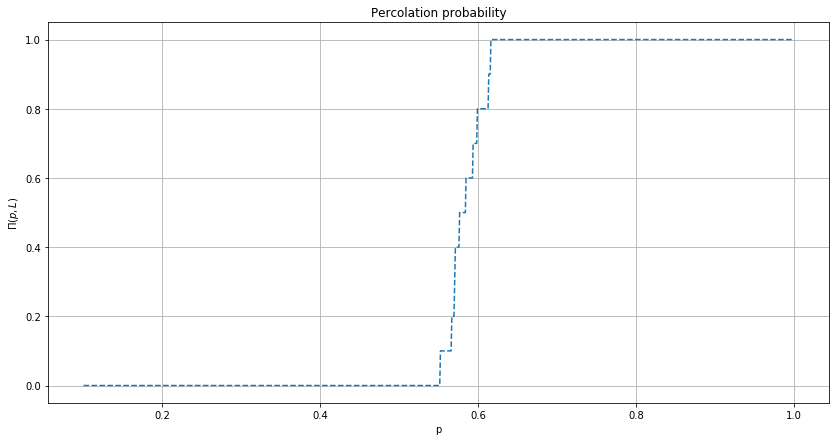

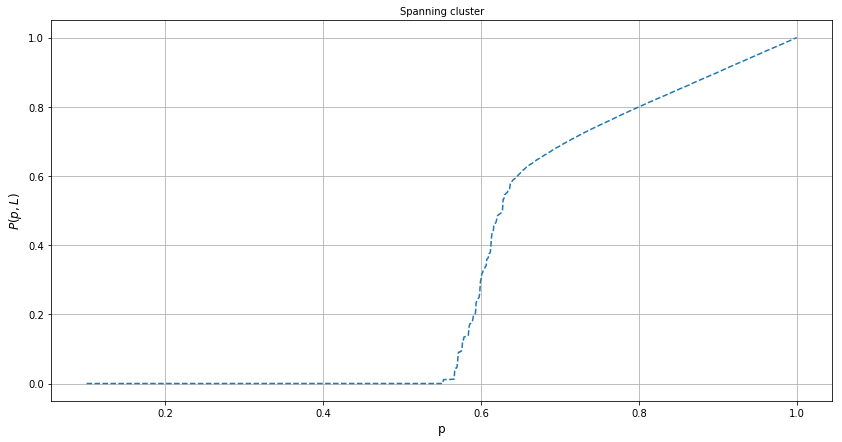

In [7]:
labels = ['$\Pi (p,L)$','$P (p,L)$']

mp.plot(p, Pi, titl='Percolation probability', Ylabel='$\Pi (p,L)$',Xlabel='p', ltype = '--')

mp.plot(p, P, titl='Spanning cluster', Ylabel='$P(p,L)$',Xlabel='p', ltype = '--')

(b) Write a program to find $P(p,L)$ and $\Pi (p,L)$ for $L = 2,4,8,16,32,64,128$. Comment on the number of samples you need to make to det a good estimate for $P$ and $\Pi$.

In [8]:
L = [2,4,8,16,32,64,128]

P = []  # spanning cluster
Pi = [] # Percolation probability
for l in L:
    # Calculating density of spanning cluster [P(p,L)] and Percolation probability [Pi(p,L)]
    Ni = np.zeros(num_p)
    Mi = np.zeros(num_p)

    for i in range(N_sim):   # running N simulation 
        r = np.random.rand(l,l)
        for ip in range(num_p): # running over all given p values
            z = r<p[ip]
            # labeling clusters by using 4-connected structure
            lw, num = measure.label(z,structure=conn)
        
            # Extracting clusters area
            area = measure.sum(z, lw, index=arange(num + 1))
            areaImg = area[lw]
        
            # Finding the bounding boxes and etracting width and height
            sliced = measure.find_objects(lw)
        
            boxes_width = np.zeros(len(sliced[:]))
            boxes_height = np.zeros(len(sliced[:]))
            for box in range(len(sliced)):
                if sliced[box] != None:
                    boxes_width[box] = sliced[box][1].stop - sliced[box][1].start
                    boxes_height[box] = sliced[box][0].stop - sliced[box][0].start
                                
            # getting positions
            jx = np.nonzero(boxes_width==l)[0]
            jy = np.nonzero(boxes_height==l)[0]
            j = sorted(list(set( list(set(jx)) + list(set(jy)) )))
            if len(j) > 0:
                Ni[ip] = Ni[ip] + 1 # percolations
                for jj in range(len(j)):
                    Mi[ip] = Mi[ip] + area[1+j[jj]]
    
    P.append(Mi/(N_sim*l**2))
    Pi.append(Ni/(N_sim))

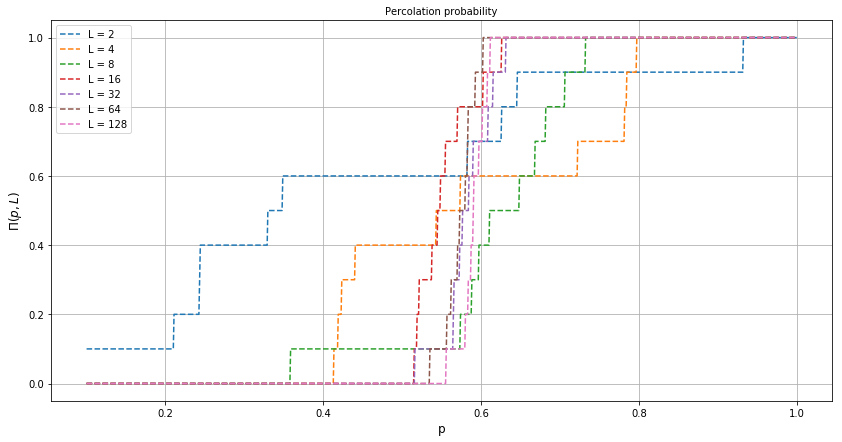

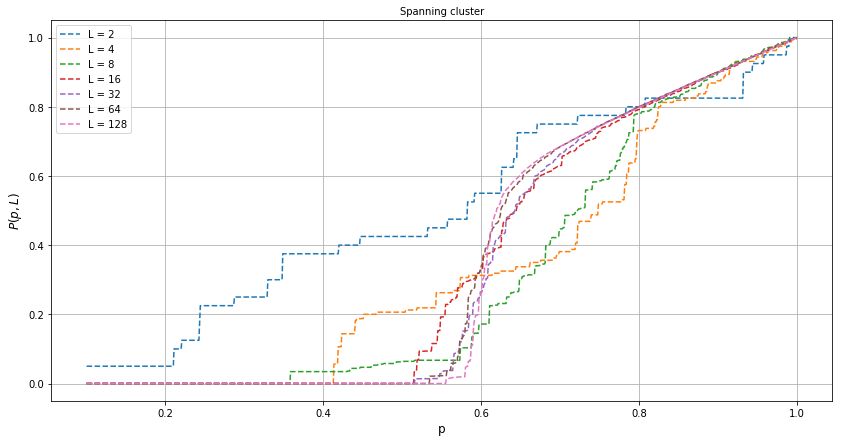

In [9]:
labels = ['L = 2','L = 4','L = 8','L = 16','L = 32','L = 64','L = 128']

fig, ax = mp.plot(p, Pi, titl='Percolation probability', Ylabel='$\Pi (p,L)$',Xlabel='p', ltype = '--')
ax.legend(labels)

fig, ax = mp.plot(p, P, titl='Spanning cluster', Ylabel='$P(p,L)$',Xlabel='p', ltype = '--')
ax.legend(labels)

(c) We know that when $p > p_c$, the probability $P(p,L)$ for a given site to belong to the percolation cluster, has the form
$$P(p,L) \sim (p - p_c)^{\beta}$$
Use your program to find an expression for $\beta$. For this you may need that
$p_c = 0.59275$.

In [39]:
import numpy as np
import scipy.ndimage.measurements as measure
import myplot as mp

In [48]:
## initial parameters
pc = 0.59275                                 # critical probability
p_start = 0.1
p_end = 1
num_p = 1000                                 # number of steps for filling probability
p = np.linspace((pc + p_start),p_end,num_p)  # probability of a block being filled
L = [200]                                    # number of sites
N_sim = 100                                   # number of simulations

## Creating connectivity structure: 4-connected structure
conn = np.ones((3,3))
conn[0,0] = 0
conn[0,2] = 0
conn[2,0] = 0
conn[2,2] = 0
print('Connectivity structure: ', conn)

Connectivity structure:  [[0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


In [49]:
P = []  # spanning cluster
for l in L:
    # Calculating density of spanning cluster [P(p,L)]
    Mi = np.zeros(num_p)
    for i in range(N_sim):   # running N simulation 
        r = np.random.rand(l,l)
        for ip in range(num_p): # running over all given p values
            z = r<p[ip]
            # labeling clusters by using 4-connected structure
            lw, num = measure.label(z,structure=conn)
        
            # Extracting clusters area
            area = measure.sum(z, lw, index=np.arange(num + 1))
            areaImg = area[lw]
        
            # Finding the bounding boxes and etracting width and height
            sliced = measure.find_objects(lw)
        
            boxes_width = np.zeros(len(sliced[:]))
            boxes_height = np.zeros(len(sliced[:]))
            for box in range(len(sliced)):
                if sliced[box] != None:
                    boxes_width[box] = sliced[box][1].stop - sliced[box][1].start
                    boxes_height[box] = sliced[box][0].stop - sliced[box][0].start
                                
            # getting positions
            jx = np.nonzero(boxes_width==l)[0]
            jy = np.nonzero(boxes_height==l)[0]
            j = sorted(list(set( list(set(jx)) + list(set(jy)) )))
            if len(j) > 0:
                for jj in range(len(j)):
                    Mi[ip] = Mi[ip] + area[1+j[jj]]
    
    P.append( np.log10(Mi/(N_sim*l**2)) )

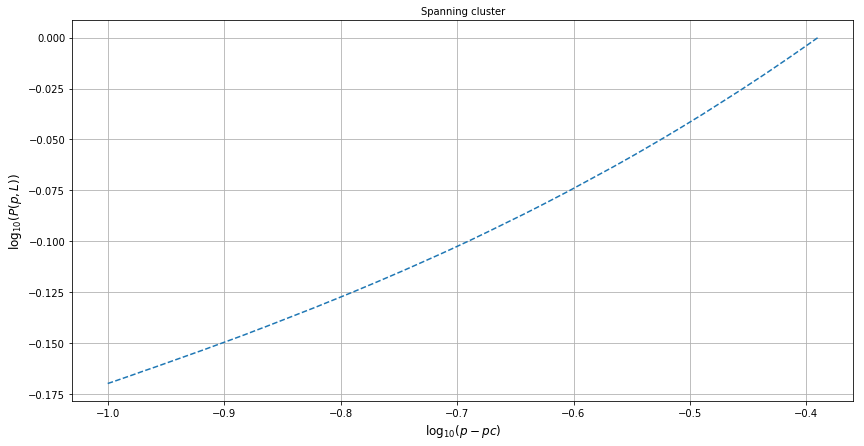

In [50]:
fig, ax = mp.plot(np.log10(p-pc), P, titl='Spanning cluster', Ylabel='$\log_{10} (P(p,L))$',
                  Xlabel='$\log_{10} (p-pc)$', ltype = '--')

In [51]:
logp = np.log10(p-pc)

b = (P[0][3] - P[0][0])/( logp[3] - logp[0] )

print('Estimated beta value: ' , b)
print('Expected beta value: ', (5/36))

Estimated beta value:  0.19320106878916024
Expected beta value:  0.1388888888888889


### Cluster number density $n(s,p)$

We will generate the cluster number density $n(s, p)$ from the two-dimensional data-set.

(f) Estimate $n(s, p)$ for a sequence of $p$ values approaching $p_c = 0.59275$ from above and below.

Hint 1: The cluster sizes are extracted using .Area as described in a previous exercise.

Hint 2: Remember to remove the percolating cluster. 

Hint 3: Use logarithmic binning.

In [15]:
import numpy as np
import scipy.ndimage.measurements as measure
import myplot as mp

In [16]:
## initial parameters
pc = 0.59275                                 # critical probability 
p = [pc + 0.02*x for x in range(-4,5)]       # probability of a block being filled
L = 200                                      # number of sites
N_sim = 1000                                  # number of simulations
d = 2   # dimention
delta_s = [2**x for x in range(1,16)] + [L**d] # binning
Ds = [delta_s[0]] + list(np.array(delta_s[1:]) - np.array(delta_s[:(len(delta_s)-1)]))

## Creating connectivity structure: 4-connected structure
conn = np.ones((3,3))
conn[0,0] = 0
conn[0,2] = 0
conn[2,0] = 0
conn[2,2] = 0
print('Connectivity structure: ', conn)

Connectivity structure:  [[0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


In [17]:
## Calculating cluster number density
Ns = np.zeros( (L**d,len(p)) )

Ns_ds = np.zeros( (len(delta_s),len(p)) )
n = np.zeros( (len(delta_s),len(p)) )     # cluster number density
log_n = np.zeros( (len(delta_s),len(p)) )

r = np.random.rand(L,L)
for i in range(N_sim):   # running N simulation
    print('simulation:', i)
    for ip in range(len(p)): # running over all given p values
        z = r<p[ip]
        # labeling clusters by using 4-connected structure
        lw, num = measure.label(z,structure=conn)
        
        # Extracting clusters area
        area = measure.sum(z, lw, index=np.arange(num + 1))
        
        # Finding the bounding boxes and etracting width and height
        sliced = measure.find_objects(lw)
        
        boxes_width = np.zeros(len(sliced[:]))
        boxes_height = np.zeros(len(sliced[:]))
        for box in range(len(sliced)):
            if sliced[box] != None:
                boxes_width[box] = sliced[box][1].stop - sliced[box][1].start
                boxes_height[box] = sliced[box][0].stop - sliced[box][0].start
        
        
        for s_i in area.astype(int):
            Ns[s_i][ip] = Ns[s_i][ip] + 1
            
        # Removing percolating clusters
        jx = np.nonzero(boxes_width == L)[0]
        jy = np.nonzero(boxes_height == L)[0]
        j = sorted(list(set( list(set(jx)) + list(set(jy)) )))
        if len(j) > 0:
            for s in j:
                Ns[ int(area[s+1])][ip] = Ns[ int(area[s+1]) ][ip] - 1 # Removing the percolating cluster. 
        
        # Binning data
        j = 0
        start_ds = 0
        for ds in delta_s:
            if ds < L**d:
                for s in range(start_ds,ds):
                    Ns_ds[j,ip] = Ns_ds[j][ip] + Ns[s][ip]
            else:
                for s in range(start_ds,L**d):
                    Ns_ds[j,ip] = Ns_ds[j][ip] + Ns[s][ip]
            j = j + 1
            start_ds = ds
            
## Average cluster number density
for ip in range(len(p)):
    n[:,ip] = Ns_ds[:,ip]/(L**d*N_sim)/Ds
    log_n[:,ip] = np.log10(Ns_ds[:,ip]/(L**d*N_sim)/Ds)

simulation: 0
simulation: 1
simulation: 2
simulation: 3
simulation: 4
simulation: 5
simulation: 6
simulation: 7
simulation: 8
simulation: 9
simulation: 10
simulation: 11
simulation: 12
simulation: 13
simulation: 14
simulation: 15
simulation: 16
simulation: 17
simulation: 18
simulation: 19
simulation: 20
simulation: 21
simulation: 22
simulation: 23
simulation: 24
simulation: 25
simulation: 26
simulation: 27
simulation: 28
simulation: 29
simulation: 30
simulation: 31
simulation: 32
simulation: 33
simulation: 34
simulation: 35
simulation: 36
simulation: 37
simulation: 38
simulation: 39
simulation: 40
simulation: 41
simulation: 42
simulation: 43
simulation: 44
simulation: 45
simulation: 46
simulation: 47
simulation: 48
simulation: 49
simulation: 50
simulation: 51
simulation: 52
simulation: 53
simulation: 54
simulation: 55
simulation: 56
simulation: 57
simulation: 58
simulation: 59
simulation: 60
simulation: 61
simulation: 62
simulation: 63
simulation: 64
simulation: 65
simulation: 66
simul

simulation: 519
simulation: 520
simulation: 521
simulation: 522
simulation: 523
simulation: 524
simulation: 525
simulation: 526
simulation: 527
simulation: 528
simulation: 529
simulation: 530
simulation: 531
simulation: 532
simulation: 533
simulation: 534
simulation: 535
simulation: 536
simulation: 537
simulation: 538
simulation: 539
simulation: 540
simulation: 541
simulation: 542
simulation: 543
simulation: 544
simulation: 545
simulation: 546
simulation: 547
simulation: 548
simulation: 549
simulation: 550
simulation: 551
simulation: 552
simulation: 553
simulation: 554
simulation: 555
simulation: 556
simulation: 557
simulation: 558
simulation: 559
simulation: 560
simulation: 561
simulation: 562
simulation: 563
simulation: 564
simulation: 565
simulation: 566
simulation: 567
simulation: 568
simulation: 569
simulation: 570
simulation: 571
simulation: 572
simulation: 573
simulation: 574
simulation: 575
simulation: 576
simulation: 577
simulation: 578
simulation: 579
simulation: 580
simulati

/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10


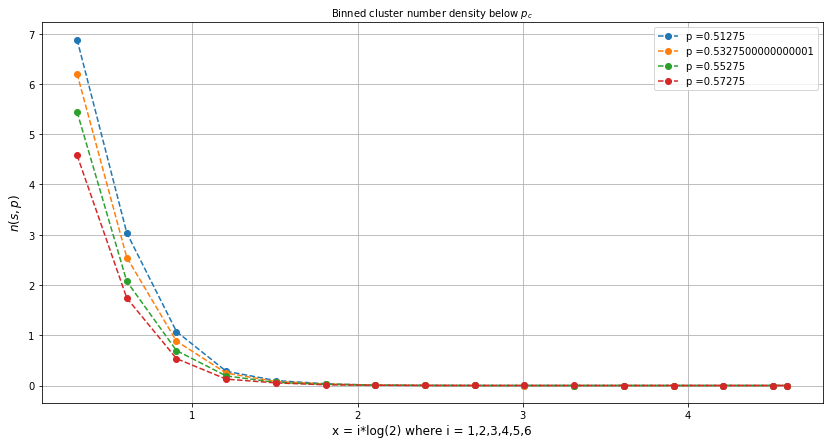

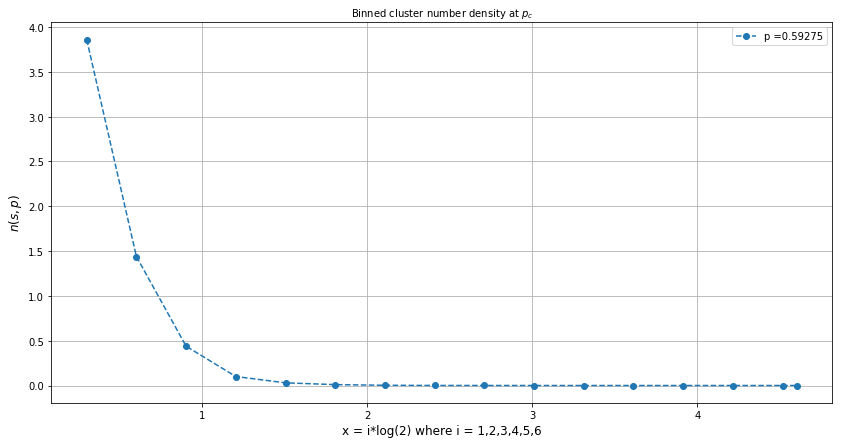

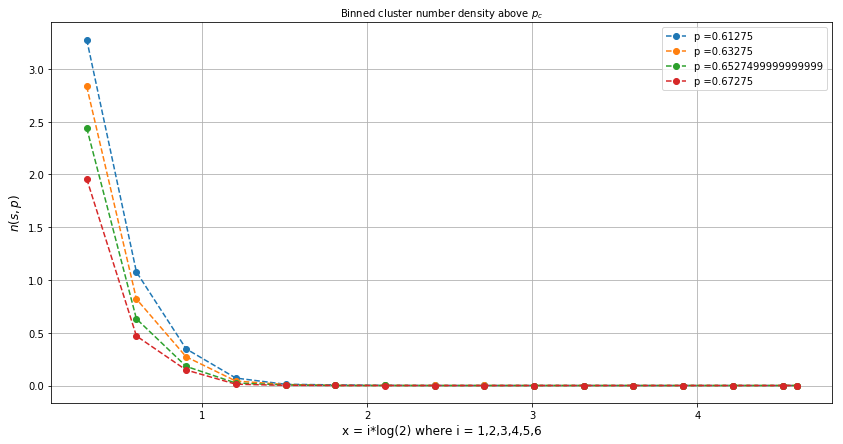

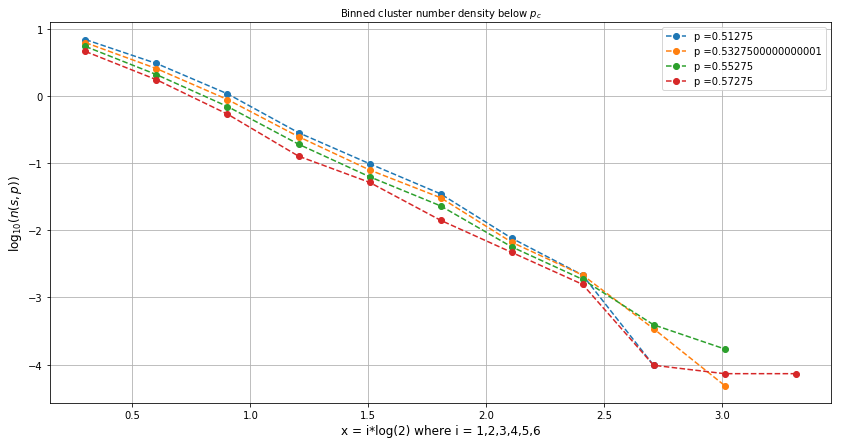

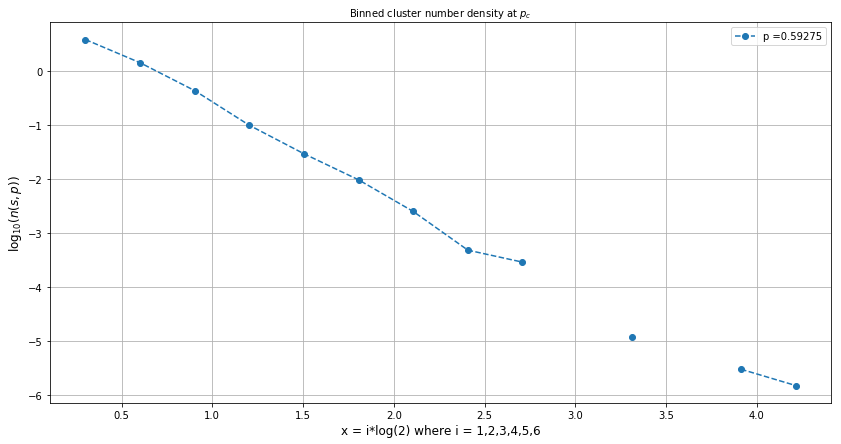

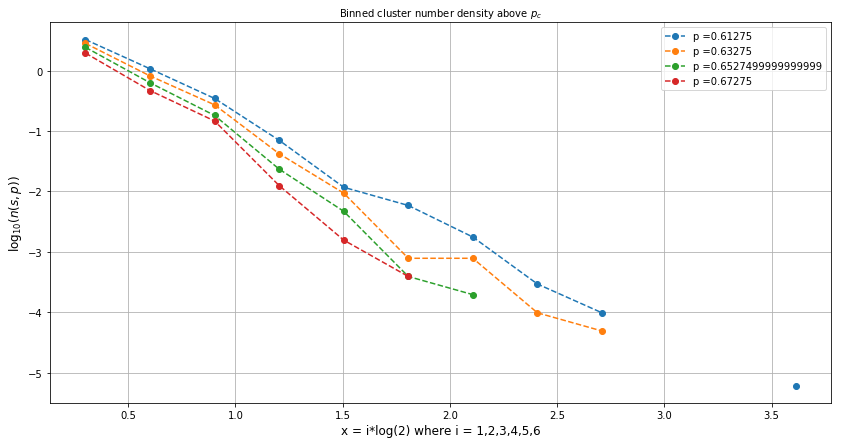

In [18]:
labels = []
for j in range(len(p)):
    labels.append('p ='+str(p[j])+'')

fig, ax = mp.plot(np.log10(np.array(delta_s)), n[:,0:4], titl='Binned cluster number density below $p_c$', 
                  Ylabel='$n (s,p)$', Xlabel='x = i*log(2) where i = 1,2,3,4,5,6',ltype = 'o--')
ax.legend(labels[0:4])

fig, ax = mp.plot(np.log10(np.array(delta_s)), n[:,4], titl='Binned cluster number density at $p_c$', 
                  Ylabel='$n (s,p)$',Xlabel='x = i*log(2) where i = 1,2,3,4,5,6',ltype = 'o--')
ax.legend([labels[4]])

fig, ax = mp.plot(np.log10(np.array(delta_s)), n[:,5:], titl='Binned cluster number density above $p_c$', 
                  Ylabel='$n (s,p)$',Xlabel='x = i*log(2) where i = 1,2,3,4,5,6',ltype = 'o--')
ax.legend(labels[5:])

## log n
fig, ax = mp.plot(np.log10(np.array(delta_s)), log_n[:,0:4], titl='Binned cluster number density below $p_c$', 
                  Ylabel='$\log_{10}(n (s,p))$',Xlabel='x = i*log(2) where i = 1,2,3,4,5,6',ltype = 'o--')
ax.legend(labels[0:4])

fig, ax = mp.plot(np.log10(np.array(delta_s)), log_n[:,4], titl='Binned cluster number density at $p_c$', 
                  Ylabel='$\log_{10}(n (s,p))$',Xlabel='x = i*log(2) where i = 1,2,3,4,5,6',ltype = 'o--')
ax.legend([labels[4]])

fig, ax = mp.plot(np.log10(np.array(delta_s)), log_n[:,5:], titl='Binned cluster number density above $p_c$', 
                  Ylabel='$\log_{10}(n (s,p))$',Xlabel='x = i*log(2) where i = 1,2,3,4,5,6',ltype = 'o--')
ax.legend(labels[5:])

(g) Estimate $n(s,p_c;L)$ for $L = 2^k$ for $k = 4, \dots ,9$. Use this plot to estimate $\tau$.

In [52]:
import numpy as np
import scipy.ndimage.measurements as measure
import myplot as mp

In [53]:
## initial parameters
pc = 0.59275                               # critical probability 
L = [2**4, 2**5, 2**6, 2**7, 2**8, 2**9]   # number of sites
N_sim = 1000   # number of simulations
d = 2        # dimention
delta_s = [2**x for x in range(1,18)] + [L[len(L)-1]**d] # binning
Ds = [delta_s[0]] + list(np.array(delta_s[1:]) - np.array(delta_s[:(len(delta_s)-1)]))

## Creating connectivity structure: 4-connected structure
conn = np.ones((3,3))
conn[0,0] = 0
conn[0,2] = 0
conn[2,0] = 0
conn[2,2] = 0
print('Connectivity structure: ')
print(conn)

Connectivity structure: 
[[0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


In [54]:
## Calculating cluster number density
n_pc = []
ds_pc = []
n_log = []
ds_log = []
for l in L:
    Ns = np.zeros( l**d )
    Ns_ds = np.zeros( len(delta_s) )
    ds_l = []
    for i in range(N_sim):   # running N simulation 
        r = np.random.rand(l,l)
        z = r<pc
        # labeling clusters by using 4-connected structure
        lw, num = measure.label(z,structure=conn)
        
        # Extracting clusters area
        area = measure.sum(z, lw, index=np.arange(num + 1))
        
        # Finding the bounding boxes and etracting width and height
        sliced = measure.find_objects(lw)
        
        boxes_width = np.zeros(len(sliced[:]))
        boxes_height = np.zeros(len(sliced[:]))
        for box in range(len(sliced)):
            if sliced[box] != None:
                boxes_width[box] = sliced[box][1].stop - sliced[box][1].start
                boxes_height[box] = sliced[box][0].stop - sliced[box][0].start
    
        for s_i in area.astype(int):
            Ns[s_i] = Ns[s_i] + 1
            
        # Removing percolating clusters
        jx = np.nonzero(boxes_width == L)[0]
        jy = np.nonzero(boxes_height == L)[0]
        j = sorted(list(set( list(set(jx)) + list(set(jy)) )))
        if len(j) > 0:
            for s in j:
                Ns[int(area[1+s])] = Ns[int(area[1+s])] - 1 # Removing the percolating cluster. 
                
        # Binning data
        j = 0
        start_ds = 0
        for ds in delta_s:
            if ds < l**d:
                for s in range(start_ds,ds):
                    Ns_ds[j] = Ns_ds[j] + Ns[s]
                if i == 0:
                    ds_l.append(ds)
            else:
                for s in range(start_ds,l**d):
                    Ns_ds[j] = Ns_ds[j] + Ns[s]
                if i == 0:
                    ds_l.append(l**d)
            j = j + 1
            start_ds = ds
        
    ## Average cluster number density
    n_pc.append( Ns_ds/(l**d*N_sim)/Ds )
    ds_pc.append( np.array(ds_l) )
    n_log.append( np.log10(Ns_ds/(l**d*N_sim)/Ds ) )
    ds_log.append( np.log10(np.array(ds_l)) )

/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log10


(0, 300)

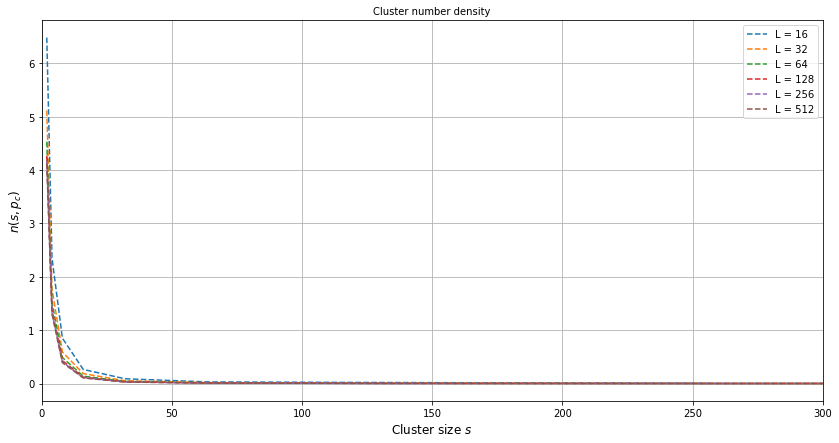

In [55]:
labels = labels = ['L = '+str(L[0])+'', 'L = '+str(L[1])+'', 'L = '+str(L[2])+'', 'L = '+str(L[3])+'', 
                   'L = '+str(L[4])+'', 'L = '+str(L[5])+'']

fig, ax = mp.plot(ds_pc, n_pc, titl='Cluster number density', Ylabel='$n (s,p_c)$',
                  Xlabel='Cluster size $s$',ltype = '--')
ax.legend(labels)
ax.set_xlim(0,300)

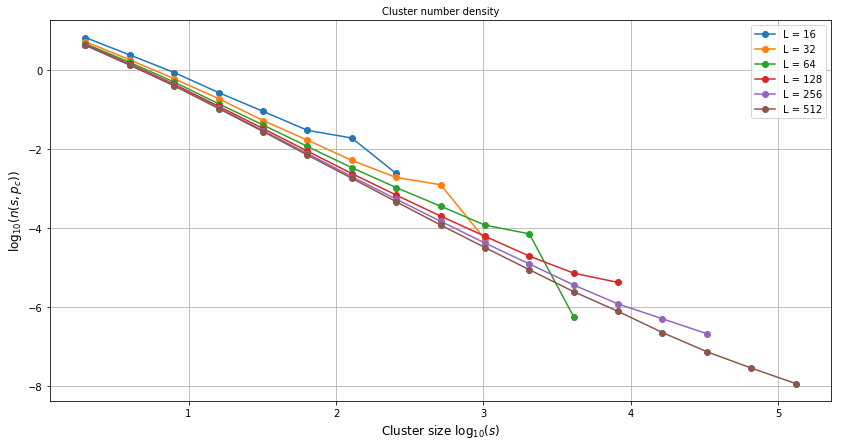

In [56]:
fig, ax = mp.plot(ds_log, n_log, titl='Cluster number density', Ylabel='$\log_{10}(n(s,p_c))$',
                  Xlabel='Cluster size $\log_{10}(s)$',ltype = 'o-')
ax.legend(labels)

In [57]:
## Estimating tau
tau = (n_log[5][11] - n_log[5][3])/(ds_log[5][11] - ds_log[5][3])

print('Estimated tau: ', tau)
print('Expected tau: ', (-187/91))

Estimated tau:  -1.9217108882743155
Expected tau:  -2.0549450549450547


(h) Can you estimate the scaling of $s_{\xi} \sim |p - pc|^{-1/\sigma}$ using this data-set?

Hint 1: Use $n(s,p)/n(s,p_c) = F(s/s_{\xi}) = 0.5$ as the definition of $s_{\xi}$.

In [73]:
import numpy as np
import scipy.ndimage.measurements as measure
import myplot as mp

In [94]:
## initial parameters
pc = 0.59275                                 # critical probability 
p = [(pc - 0.01*x) for x in range(0,7)]  # probability of a block being filled
L = 2**9                                                  # number of sites
N_sim = 100                                               # number of simulations
d = 2   # dimention
delta_s = [2**x for x in range(1,13)] + [x*2**(14) for x in range(1,17)] # binning
Ds = [delta_s[0]] + list(np.array(delta_s[1:]) - np.array(delta_s[:(len(delta_s)-1)]))

## Creating connectivity structure: 4-connected structure
conn = np.ones((3,3))
conn[0,0] = 0
conn[0,2] = 0
conn[2,0] = 0
conn[2,2] = 0
print('Connectivity structure: ', conn)

Connectivity structure:  [[0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


In [95]:
## Calculating cluster number density
Ns = np.zeros( (L**d,len(p)) )
Ns_ds = np.zeros( (len(delta_s),len(p)) )

for i in range(N_sim):   # running N simulation
    r = np.random.rand(L,L)
    for ip in range(len(p)): # running over all given p values
        z = r<p[ip]
        # labeling clusters by using 4-connected structure
        lw, num = measure.label(z,structure=conn)
        
        # Extracting clusters area
        area = measure.sum(z, lw, index=np.arange(num + 1))
        
        # Finding the bounding boxes and etracting width and height
        sliced = measure.find_objects(lw)
        
        boxes_width = np.zeros(len(sliced[:]))
        boxes_height = np.zeros(len(sliced[:]))
        for box in range(len(sliced)):
            if sliced[box] != None:
                boxes_width[box] = sliced[box][1].stop - sliced[box][1].start
                boxes_height[box] = sliced[box][0].stop - sliced[box][0].start
                        
        for s in area.astype(int):
            Ns[s][ip] = Ns[s][ip] + 1
        
        # Removing percolating clusters
        jx = np.nonzero(boxes_width == L)[0]
        jy = np.nonzero(boxes_height == L)[0]
        j = sorted(list(set( list(set(jx)) + list(set(jy)) )))
        if len(j) > 0:
            for s in j:
                Ns[ int(area[s+1])][ip] = Ns[ int(area[s+1]) ][ip] - 1 # Removing the percolating cluster.
        
        ## Binning data
        j = 0
        start_ds = 0
        for ds in delta_s:
            if ds < L**d:
                for s in range(start_ds,ds):
                    Ns_ds[j,ip] = Ns_ds[j][ip] + Ns[s][ip]
            else:
                for s in range(start_ds,L**d):
                    Ns_ds[j,ip] = Ns_ds[j][ip] + Ns[s][ip]
            j = j + 1
            start_ds = ds

In [96]:
n = []
logn = []
n_frac = []
logn_frac = []

## Average cluster number density
for ip in range(0,len(p)):
    n.append(Ns_ds[:,ip]/(L**d*N_sim*np.array(Ds)))
    logn.append( np.log10(Ns_ds[:,ip]/(L**d*N_sim*np.array(Ds))) )

## n(s,p)/n(s,p_c)
for ip in range(1,len(p)):
    n_frac.append(np.array(n[ip])/(np.array(n[0])))
    logn_frac.append( np.log10(np.array(n[ip])/(np.array(n[0]))) )

/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


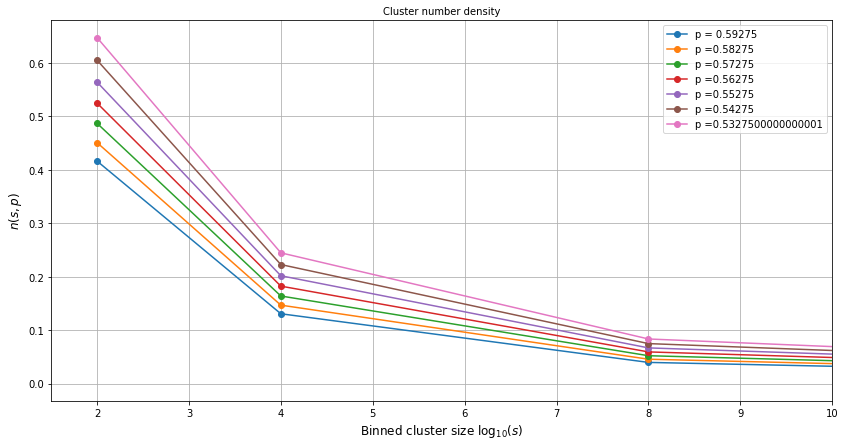

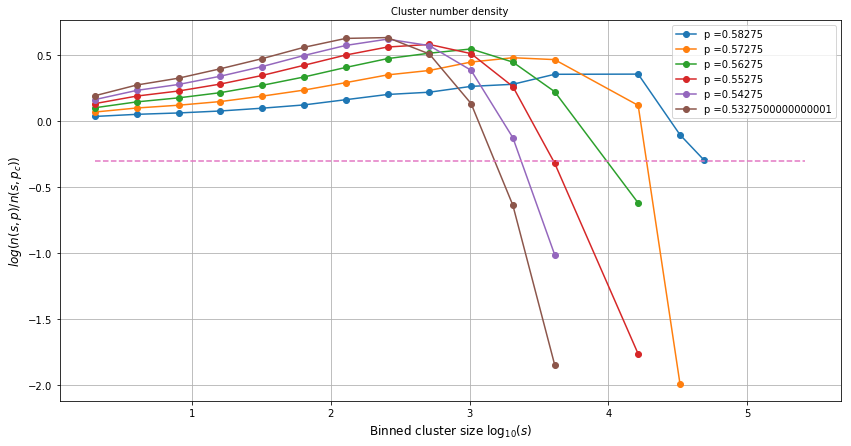

In [97]:
x_05 = 0.5*np.ones(len(Ds))

labels = []
for ip in p:
    if ip > pc or ip < pc:
        labels.append('p ='+str(ip)+'')

s = np.arange(0,L**d)

fig, ax = mp.plot(np.array(delta_s), n, titl='Cluster number density', Ylabel='$n(s,p)$',
                  Xlabel='Binned cluster size $\log_{10}(s)$',ltype = 'o-')
ax.legend(['p = '+str(pc)+'']+labels)
ax.set_xlim(1.5,10)

fig, ax = mp.plot(np.log10(delta_s), logn_frac, titl='Cluster number density', Ylabel='$log(n(s,p)/n(s,p_c))$',
                  Xlabel='Binned cluster size $\log_{10}(s)$',ltype = 'o-')
ax.plot(np.log10(delta_s),np.log10(x_05),'--')
ax.legend(labels)

In [98]:
s_xi = []
for i in range(len(p)-1):
    for j in range(len(logn_frac[i])):
        if logn_frac[i][j-1] - np.log10(0.5) > 0 and logn_frac[i][j] - np.log10(0.5) < 0:
            
            if abs(logn_frac[i][j-1] - np.log10(0.5)) < abs(logn_frac[i][j] - np.log10(0.5)):
                s_xi.append( delta_s[j-1]  )
            if abs(logn_frac[i][j-1] - np.log10(0.5)) > abs(logn_frac[i][j] - np.log10(0.5)):
                s_xi.append( delta_s[j]  )
        
        if n_frac[i][j] == np.log10(0.5):
            s_xi.append( p[j]  )

In [99]:
delta_s

[2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 16384,
 32768,
 49152,
 65536,
 81920,
 98304,
 114688,
 131072,
 147456,
 163840,
 180224,
 196608,
 212992,
 229376,
 245760,
 262144]

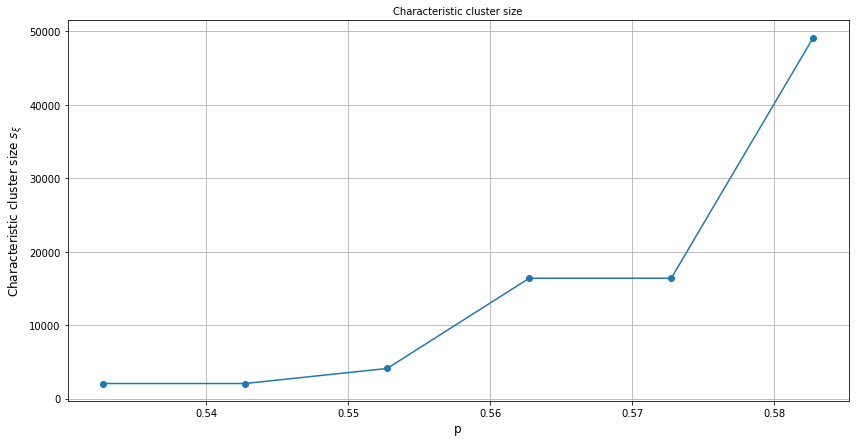

In [101]:
pnew = abs( np.array(p[1:])-pc )

fig, ax = mp.plot(np.array(p[1:]), np.array(s_xi), titl='Characteristic cluster size', Ylabel='Characteristic cluster size $s_\\xi$',
                  Xlabel='p',ltype = 'o-')

In [104]:
logp_pc = np.log10(abs( np.array(p[1:])-pc ))
logs_xi = np.log10(np.array(s_xi))

sigma = - (logp_pc[2]-logp_pc[5])/( logs_xi[2]-logs_xi[5] )

print('Estimated sigma value: ' , sigma)
print('Expected sigma value: ' , (36/91))

Estimated sigma value:  0.33333333333333254
Expected sigma value:  0.3956043956043956


### Mass scaling of percolating cluster

(j) Find the mass $M(L)$ of the percolating cluster at $p = p_c$ as a function of $L$, for $L = 2^k$, $k = 4,\dots ,11$. Plot $\log(M)$ as a function of $\log(L)$ and determine the exponent $D$.

In [31]:
import numpy as np
import scipy.ndimage.measurements as measure
import myplot as mp

In [32]:
## initial parameters
pc = 0.59275                        # critical probability 
L = [(2**x) for x in range(4,12)]   # number of sites
N_sim = 100                         # number of simulations
d = 2                               # dimention

## Creating connectivity structure: 4-connected structure
conn = np.ones((3,3))
conn[0,0] = 0
conn[0,2] = 0
conn[2,0] = 0
conn[2,2] = 0
print('Connectivity structure: ', conn)

Connectivity structure:  [[0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


In [33]:
## Extracting the mass 𝑀(𝐿) of the percolating cluster

Mi = np.zeros(len(L))
for l, il in zip( L, range(len(L)) ):
    for i in range(N_sim):   # running N simulation
        r = np.random.rand(l,l)
        z = r<pc
        # labeling clusters by using 4-connected structure
        lw, num = measure.label(z,structure=conn)
        
        # Extracting clusters area
        area = measure.sum(z, lw, index=np.arange(num + 1))
    
        # Finding the bounding boxes and etracting width and height
        sliced = measure.find_objects(lw)
        
        boxes_width = np.zeros(len(sliced[:]))
        boxes_height = np.zeros(len(sliced[:]))
        for box in range(len(sliced)):
            if sliced[box] != None:
                boxes_width[box] = sliced[box][1].stop - sliced[box][1].start
                boxes_height[box] = sliced[box][0].stop - sliced[box][0].start
                                
        # Picking those who percolate, while ignoring the others
        jx = np.nonzero(boxes_width==l)[0]
        jy = np.nonzero(boxes_height==l)[0]
        j = sorted(list(set( list(set(jx)) + list(set(jy)) )))
        if len(j) > 0:
            for s in j:
                Mi[il] = Mi[il] + area[1+s] # extracting mass
                
M_L = Mi/N_sim

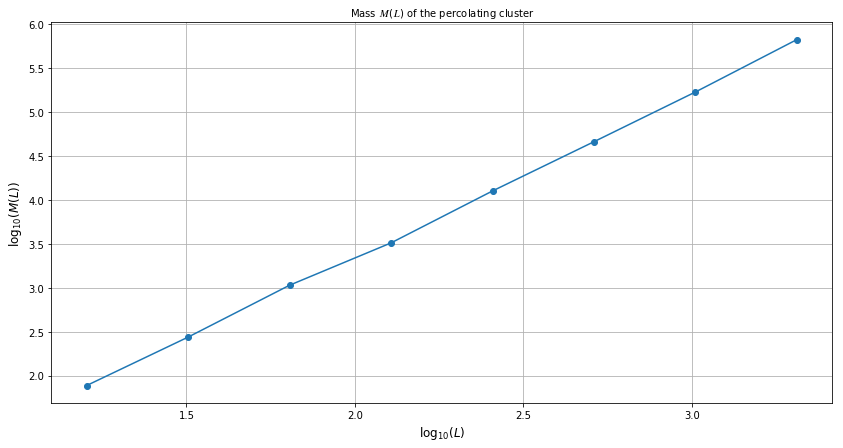

In [34]:
fig, ax = mp.plot(np.log10(L), np.log10(M_L), titl='Mass $𝑀(𝐿)$ of the percolating cluster', Ylabel='$\log_{10}(M(L))$',
                  Xlabel='$\log_{10}(L)$',ltype = 'o-')
#ax.legend(labels)
#ax.set_xlim(0,500)

In [35]:
## Estimating D
D = (np.log10(M_L[7]) - np.log10(M_L[0]))/(np.log10(L[7]) - np.log10(L[0]))

print('Estimated D: ' , D)
print('Expected D: ', (91/48))

Estimated D:  1.8666513274400904
Expected D:  1.8958333333333333


### Finite Size Scaling

In this exercise we will use a finite size scaling ansatz to provide estimates of $\nu$, $p_c$, and the average percolation probability $\langle p \rangle$ in a system of size $L$.

We define $p_{\Pi = x}$ so that
$$\Pi (p_{\Pi = x}) = x$$
notice that $p_{\Pi = x}$ is a function of system size $L$ used for the simulation.

(l) Find $p_{\Pi = x}$ for $x = 0.8$ and $x = 0.3$ for $L = 25,50,100,200,400,800$. Plot $p_{\Pi = x}$ as a function of $L$.

In [58]:
import numpy as np
import scipy.ndimage.measurements as measure
import myplot as mp

In [59]:
## initial parameters
p = list(np.linspace(0.01,0.4,5)) + list(np.linspace(0.41,0.75,100)) + list(np.linspace(0.76,1,5)) # probability of a block being filled
L = [25,50,100,200,400,800]                              # number of sites 
N_sim = 100                           # number of simulations

## Creating connectivity structure: 4-connected structure
conn = np.ones((3,3))
conn[0,0] = 0
conn[0,2] = 0
conn[2,0] = 0
conn[2,2] = 0
print('Connectivity structure: ', conn)

Connectivity structure:  [[0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


In [60]:
## Percolation probability [Pi(p,L)]
Pi = []
for l in L:
    Ni = np.zeros(len(p))
    for i in range(N_sim):   # running N simulation 
        print('simukation:', i)
        r = np.random.rand(l,l)
        for ip in range(len(p)): # running over all given p values
            z = r<p[ip]
            # labeling clusters by using 4-connected structure
            lw, num = measure.label(z,structure=conn)
        
            # Extracting clusters area
            area = measure.sum(z, lw, index=arange(num + 1))
            areaImg = area[lw]
        
            # Finding the bounding boxes and etracting width and height
            sliced = measure.find_objects(lw)
        
            boxes_width = np.zeros(len(sliced[:]))
            boxes_height = np.zeros(len(sliced[:]))
            for box in range(len(sliced)):
                if sliced[box] != None:
                    boxes_width[box] = sliced[box][1].stop - sliced[box][1].start
                    boxes_height[box] = sliced[box][0].stop - sliced[box][0].start
                                
            # getting positions
            jx = np.nonzero(boxes_width==l)[0]
            jy = np.nonzero(boxes_height==l)[0]
            j = sorted(list(set( list(set(jx)) + list(set(jy)) )))
            if len(j) > 0:
                Ni[ip] = Ni[ip] + 1 # percolations
    
    ## Percolation probability [Pi(p,L)]
    Pi.append( Ni/N_sim )
    

simukation: 0
simukation: 1
simukation: 2
simukation: 3
simukation: 4
simukation: 5
simukation: 6
simukation: 7
simukation: 8
simukation: 9
simukation: 10
simukation: 11
simukation: 12
simukation: 13
simukation: 14
simukation: 15
simukation: 16
simukation: 17
simukation: 18
simukation: 19
simukation: 20
simukation: 21
simukation: 22
simukation: 23
simukation: 24
simukation: 25
simukation: 26
simukation: 27
simukation: 28
simukation: 29
simukation: 30
simukation: 31
simukation: 32
simukation: 33
simukation: 34
simukation: 35
simukation: 36
simukation: 37
simukation: 38
simukation: 39
simukation: 40
simukation: 41
simukation: 42
simukation: 43
simukation: 44
simukation: 45
simukation: 46
simukation: 47
simukation: 48
simukation: 49
simukation: 50
simukation: 51
simukation: 52
simukation: 53
simukation: 54
simukation: 55
simukation: 56
simukation: 57
simukation: 58
simukation: 59
simukation: 60
simukation: 61
simukation: 62
simukation: 63
simukation: 64
simukation: 65
simukation: 66
simuk

simukation: 51
simukation: 52
simukation: 53
simukation: 54
simukation: 55
simukation: 56
simukation: 57
simukation: 58
simukation: 59
simukation: 60
simukation: 61
simukation: 62
simukation: 63
simukation: 64
simukation: 65
simukation: 66
simukation: 67
simukation: 68
simukation: 69
simukation: 70
simukation: 71
simukation: 72
simukation: 73
simukation: 74
simukation: 75
simukation: 76
simukation: 77
simukation: 78
simukation: 79
simukation: 80
simukation: 81
simukation: 82
simukation: 83
simukation: 84
simukation: 85
simukation: 86
simukation: 87
simukation: 88
simukation: 89
simukation: 90
simukation: 91
simukation: 92
simukation: 93
simukation: 94
simukation: 95
simukation: 96
simukation: 97
simukation: 98
simukation: 99


In [61]:
p_08 = []
p_03 = []
for i in range(len(L)):
    for j in range(len(Pi[i])):
        if Pi[i][j-1] - 0.8 < 0 and Pi[i][j] - 0.8 > 0:
            p_08.append( p[j-1]  )
        if Pi[i][j-1] - 0.3 < 0 and Pi[i][j] - 0.3 > 0:
            p_03.append( p[j-1] )
        if Pi[i][j] == 0.8:
            p_08.append( p[j]  )
        if Pi[i][j] == 0.3:
            p_03.append( p[j]  )

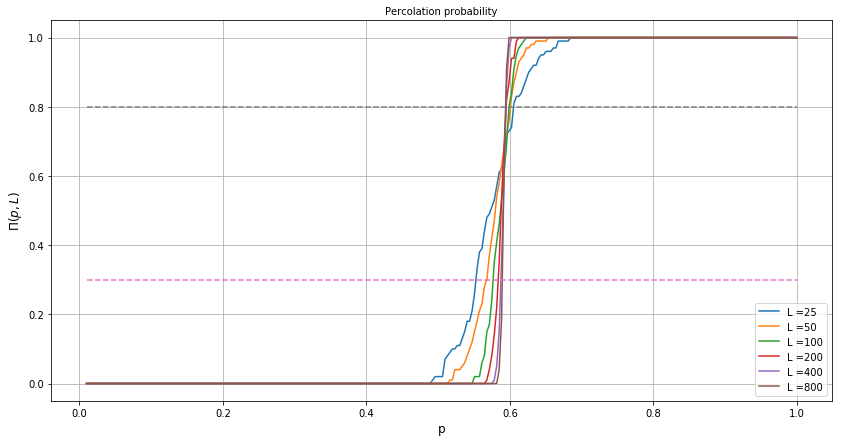

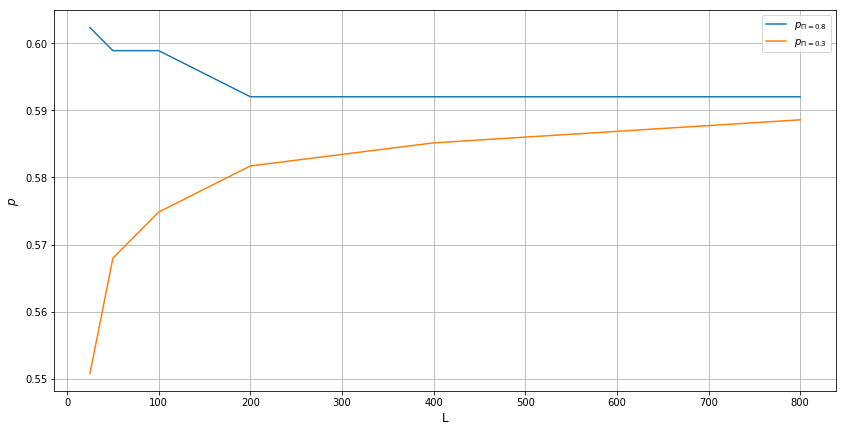

In [62]:
x_08 = 0.8*np.ones(len(p))
x_03 = 0.3*np.ones(len(p))

labels = []
for l in L:
    labels.append('L ='+str(l)+'')
    
fig, ax = mp.plot(np.array(p), Pi, titl='Percolation probability', Ylabel='$\Pi (p,L)$',Xlabel='p', ltype = '-')
ax.legend(labels)
ax.plot(p,x_03,'--')
ax.plot(p,x_08,'--')

fig, ax = mp.plot(L, np.array(p_08), Ylabel='$p$',Xlabel='L', ltype = '-')
ax.plot(L, np.array(p_03),'-')
ax.legend(['$p_{\Pi = 0.8}$','$p_{\Pi = 0.3}$'])

According to the scaling theory we have
$$p_{x_1} - p_{x_2} = (C_{x_1} - C_{x_2}) L^{-1/\nu}$$

(m) Plot $log(p_{\Pi = 0.8} - p_{\Pi = 0.3})$ as a function of $log(L)$ to estimate the exponent $\nu$. How does it compare to the exact results.

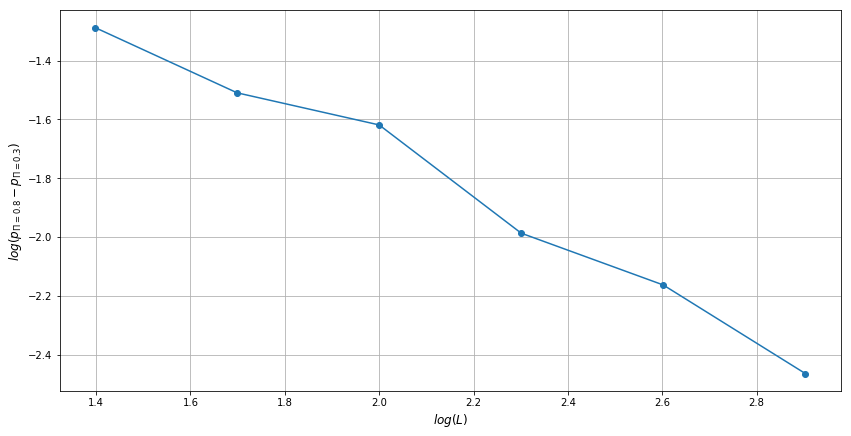

In [63]:
logp_x = np.log10(np.array(p_08) - np.array(p_03))

fig, ax = mp.plot(np.log10(L), logp_x, Ylabel='$log(p_{\Pi = 0.8} - p_{\Pi = 0.3})$',Xlabel='$log(L)$', ltype = 'o-')

In [64]:
nu = -(np.log10(L[0]) - np.log10(L[-1]))/(logp_x[0] - logp_x[-1])

print('Estimated nu: ' , nu)
print('Expected nu: ' , (4/3))

Estimated nu:  1.2797901240490805
Expected nu:  1.3333333333333333


In the following, please use the exact value of $\nu$.

The scaling theory also predicted that
$$p_{\Pi = x} = p_c + C_x ^{-1/\nu}$$

(n) Plot $p_{\Pi = x}$ as a function of $L^{-1/\nu}$ to estimate $p_c$. Generate a data-collapse plot
for $\Pi (p, L)$ to find the function $\Phi(u)$ from the lecture notes.

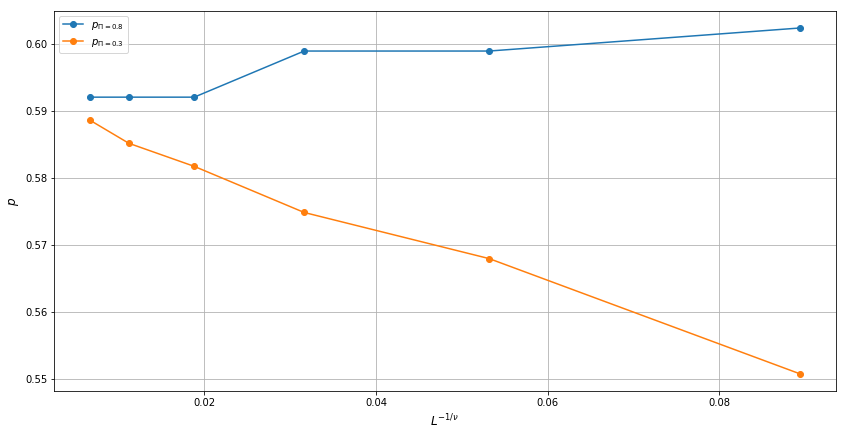

In [65]:
nu = 4/3

fig, ax = mp.plot(np.array(L)**(-1/nu), np.array(p_08), Ylabel='$p$',Xlabel='$L^{-1/\\nu}$', ltype = 'o-')
ax.plot(np.array(L)**(-1/nu), np.array(p_03),'o-')
ax.legend(['$p_{\Pi = 0.8}$','$p_{\Pi = 0.3}$'])

In [66]:
p_c = p_03[-1] + (p_08[-1] - p_03[-1])/2

print('Estimated pc: ' , p_c)

Estimated pc:  0.5903030303030303


### Singly connected bonds

We have provided a subroutine and an example program that implements the left/right- turning walker algorithm. The algorithm works on a given clusters. From one end of the cluster, two walkers are started. The walkers can only walk according to the connectivity rules on the lattice. That is, for a nearest-neighbor lattice, they can only walk to their nearest neighbors. The left-turning walker always tries to turn left from its previous direction. If this site is empty, it tries the next-best site, which is to continue straight ahead. If that is empty, it tries to move right, and if that is empty, it moves back along the direction it came. The right-turning walker follows a similar rule, but prefers to turn right in each step. The first walker to reach the other end of the cluster stops, and the other walker stops when it reaches this site.

The path of the two walkers is illustrated in the figure below. The sites that are visited by both walkers consitute the singly connected bonds. The union of the two walks consitutes what is called the external perimeter (Hull) of the cluster.

(p) Run the program $exwalk.m$ to visualize the singly connected bonds. Can you understand how this algorithm finds the singly connected bonds? Why are some of the bonds of a different color?

1
2
printing i: (array([0, 1, 1, 2, 3, 3, 3, 3, 4, 4]), array([5, 4, 5, 5, 2, 3, 4, 5, 2, 5]))
Starting walk in x=0 y=5


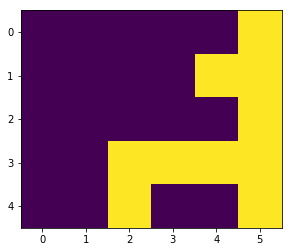

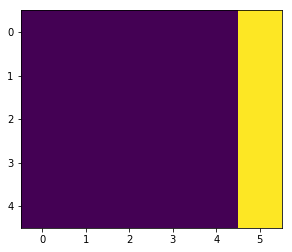

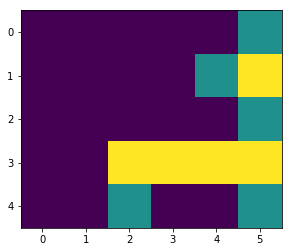

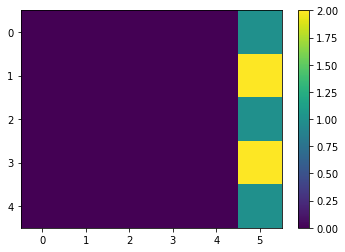

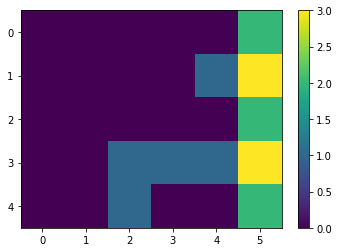

In [105]:
from pylab import *
from scipy.ndimage import measurements
from walk import walk

# exwalk.py 
# Generate spanning cluster (l-r spanning)

lx = 5
ly = 6
p = 0.586
ncount = 0
perc = []
while (len(perc)==0):
    ncount = ncount + 1
    if (ncount >1000):
        print("Couldn't make percolation cluster...")
        break
    
    z=rand(lx,ly)<p
    lw,num = measurements.label(z)         # labels the connected cluster
    perc_x = intersect1d(lw[0,:],lw[-1,:]) # finds out the labeled cluster can be found on the other side, if yes, 
                                           # returns the label of the cluster
    perc = perc_x[where(perc_x > 0)]       # ignore the cluster labeled zero, since it corresponds to 
    print(ncount)

if len(perc) > 0:
    labelList = arange(num + 1)
    area = measurements.sum(z, lw, index=labelList) # extracts area
    areaImg = area[lw]
    maxArea = area.max()
    zz = (lw == perc[0]) # we only consider one of the percolating clusters
    
    # zz now contains the spanning cluster
    figure()
    imshow(zz, interpolation='nearest', origin='upper') # Display spanning cluster
    savefig("current.pdf")
    #show()
    #% Run walk on this cluster
    l,r = walk(zz)    
    figure()
    imshow(l, interpolation='nearest', origin='upper') # Display the left walk
    figure()
    imshow(r, interpolation='nearest', origin='upper') # Display the right walk
    zzz = l*r # Find points where both l and r are non-zero
    figure()
    imshow(zzz, interpolation='nearest', origin='upper')
    colorbar()
    
    zadd = zz + zzz
    #
    #%subplot(2,2,1), imagesc(zz)
    #%subplot(2,2,2), 
    figure()
    imshow(zadd, interpolation='nearest', origin='upper')
    colorbar()
    #%subplot(2,2,3), imagesc(zzz>0)
    #%subplot(2,2,4), imagesc(l+r>0)
    show()

In [ ]:
(lw == perc[0])

(q) Find the mass, $M_{SC}$, of the singly connected bonds as a function of system size $L$ for $p = p_c$ and use this to estimate the exponent $D_{SC}: M_{SC} \propto L^{D_{SC}}$ . Can you find the behavior of $P_{SC} = M_{SC} /L^d$ as a function of $p - p_c$?

### Random walks on the spanning cluster

In this exercise we will use and modify the program $testpercwalk.m$ to study random walks in percolation systems, and on the spanning cluster in particular. We want to find the dimension $d_w$ of a two-dimensional random walk on the spanning cluster.

(r) Find the distance $\langle R^2 \rangle$ as a function of the number of steps $N$ for random walks on the spanning cluster for $p > p_c$. Plot $\log \langle R^2 \rangle$ as a function of $N$ for various values of $p$. Can you produce a data-collapse plot for $\langle R^2 \rangle$ as a function of $N$?

(s) Can you find the behavior of the correlation length $\xi$ from this plot? Discuss the behavior of the characteristic cross-over time $t_0$ based on the plot. Find the dimension, $d_w$ of the walk, from the relation $\langle R^2 \rangle \propto N^{2/d_w}$ .

(t) Find the distribution $P(R,N)$ for the position $R$ as a function of the number of steps $N$ for a random walker on the spanning cluster.